<a href="https://colab.research.google.com/github/akhilp90/Customer-Churn-Prediction-using-Machine-Learning/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


Load the Dataset

In [26]:
# Load the dataset
df = pd.read_csv("telco.csv")

# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nSample Data:")
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 n

Handling Missing Values

In [27]:
# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop irrelevant columns
df.drop(columns=['customerID'], inplace=True)

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Check for remaining missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Understanding feature distribution

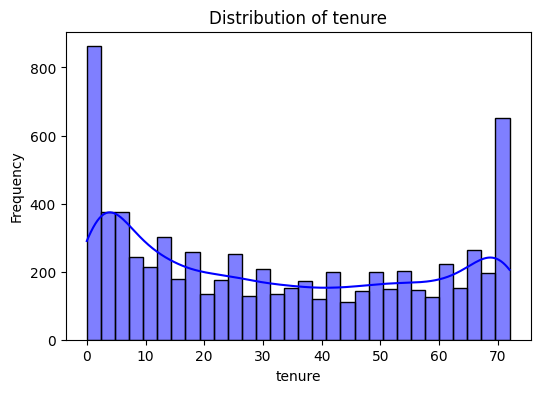

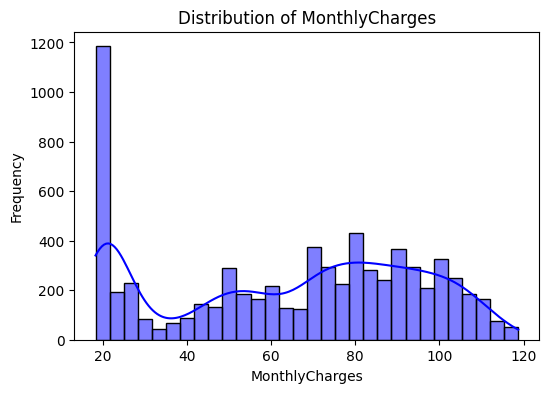

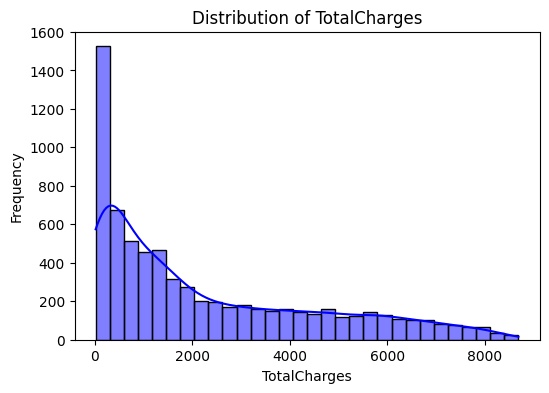

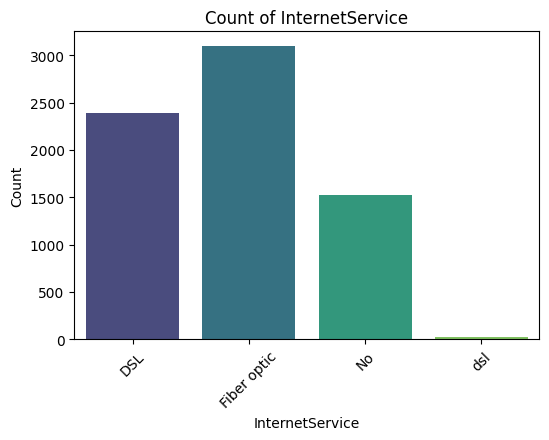

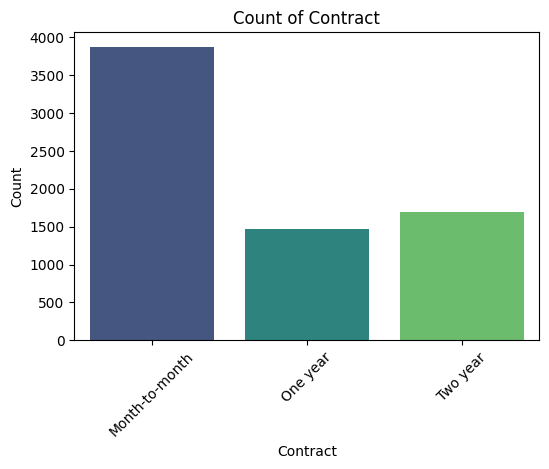

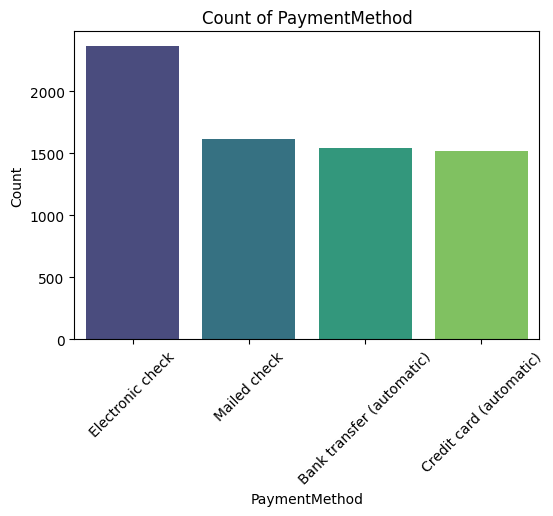

In [28]:
# Numerical feature distribution
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Categorical feature distribution
categorical_features = ['InternetService', 'Contract', 'PaymentMethod']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f"Count of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


Outlier Detection

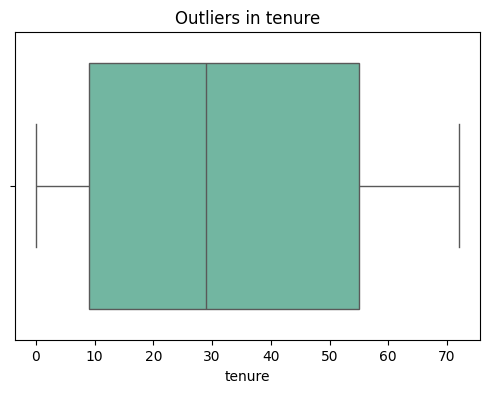

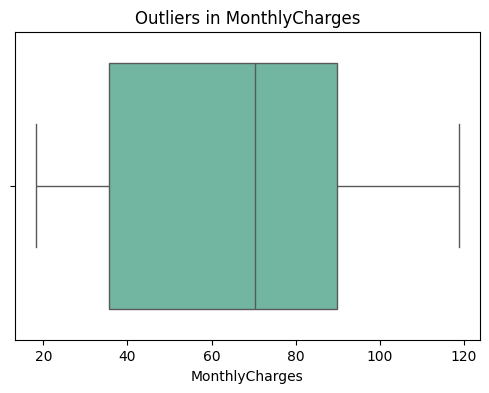

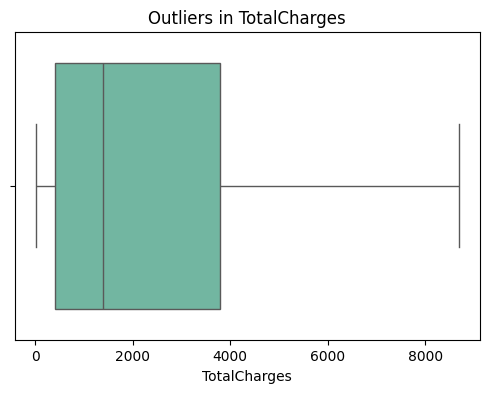

In [29]:
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=feature, palette='Set2')
    plt.title(f"Outliers in {feature}")
    plt.show()


Feature Engineering

In [30]:
# Create new features
df['ChargePerMonth'] = df['TotalCharges'] / df['tenure']
df['ChargePerMonth'].fillna(0, inplace=True)  # Handle NaN values for zero tenure

# Encode categorical variables
encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])

# Check the dataset after encoding
print("\nData After Encoding:")
print(df.head())



Data After Encoding:
   Unnamed: 0  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           0       0              0        1           0       1   
1           1       1              0        0           0      34   
2           2       1              0        0           0       2   
3           3       1              0        0           0      45   
4           4       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0

Preparing Data for Modeling

In [31]:
# Check for NaN and infinity values
print("\nChecking for missing values:")
print(X_train.isna().sum())

print("\nChecking for infinity values:")
print(np.isinf(X_train).sum())

# Replace infinite values with NaN (if any)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values by imputing them with column medians
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData scaling completed successfully.")



Checking for missing values:
Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
ChargePerMonth      0
dtype: int64

Checking for infinity values:
Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
ChargePerMonth      0
dt

Train the model

In [32]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


Model Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       373
           1       0.84      0.91      0.87      1036

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



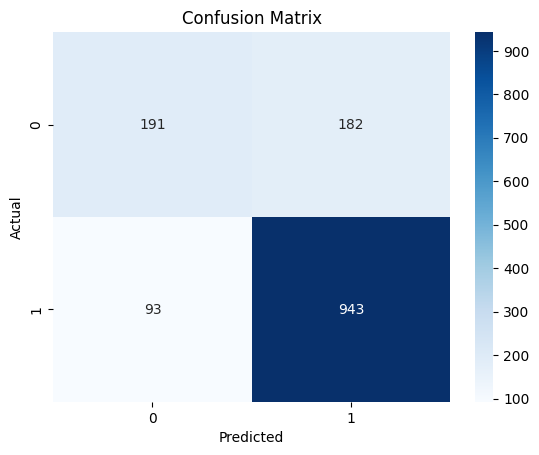


Model Accuracy: 80.48%


In [33]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Hyperparameter Tuning

In [34]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)



Best Hyperparameters:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


Customer Segmentation (K-Means Clustering)

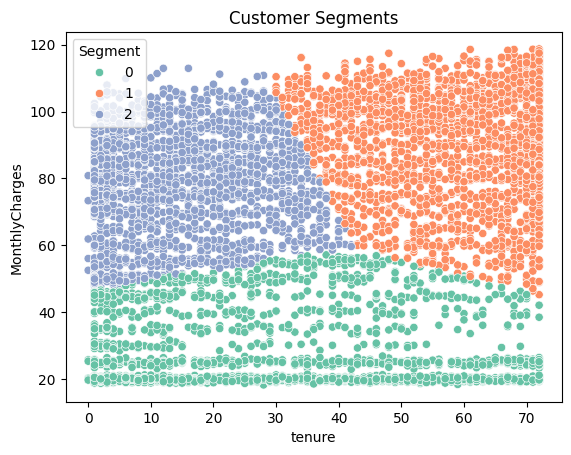

In [35]:
# Perform K-Means clustering on selected numerical features
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df[['tenure', 'MonthlyCharges']])
df['Segment'] = clusters

# Visualize clusters
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Segment', palette='Set2')
plt.title("Customer Segments")
plt.show()


Feature Importance

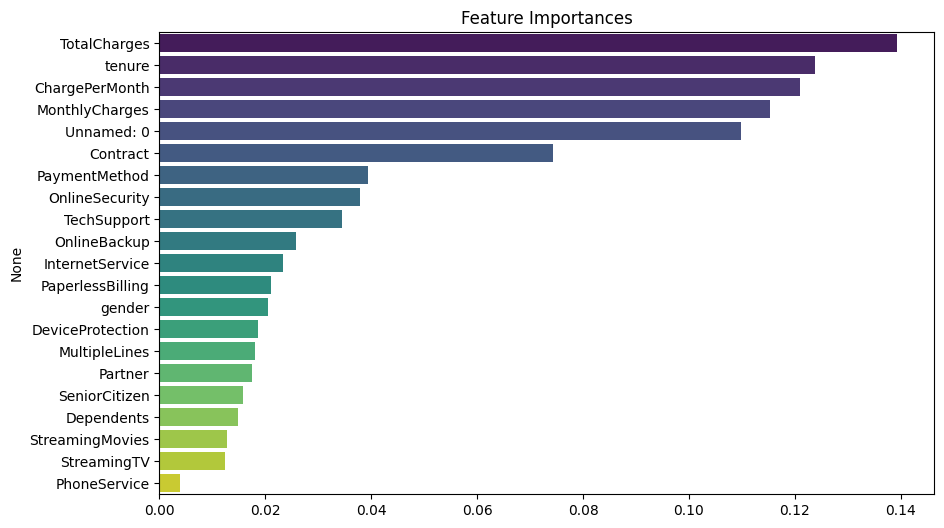

In [36]:
# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette='viridis')
plt.title("Feature Importances")
plt.show()


Feature Interaction Analysis

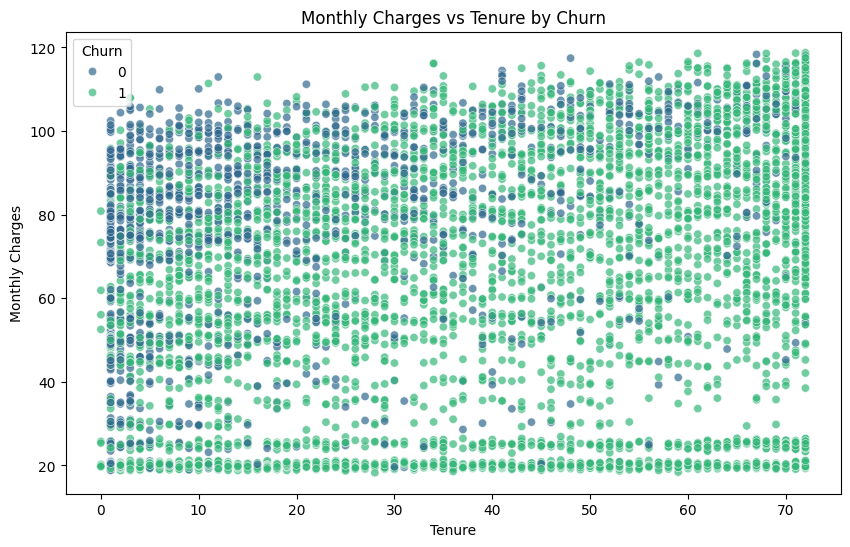

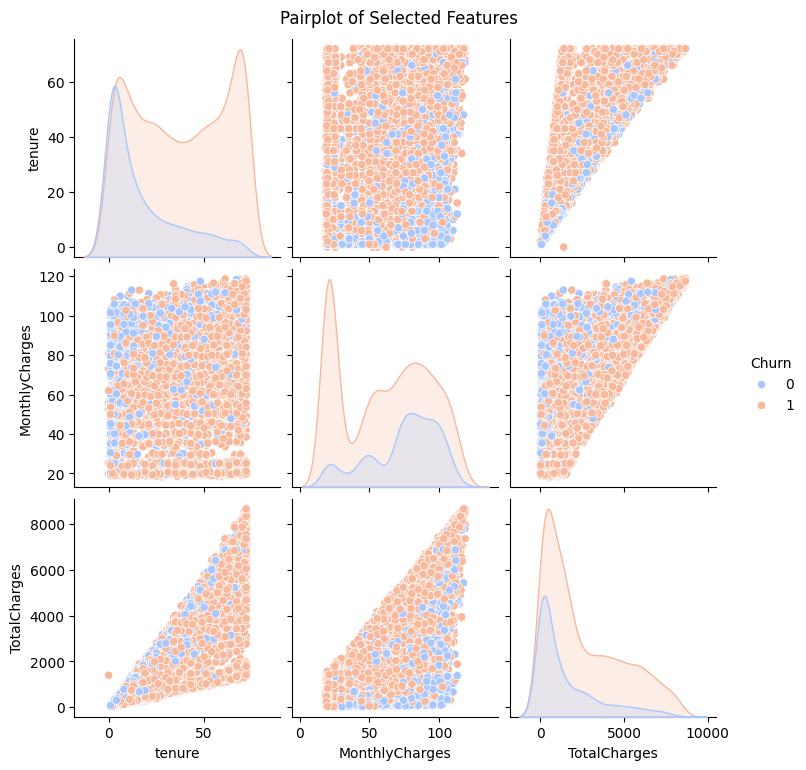

In [37]:
# Interaction: Monthly Charges vs Tenure grouped by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='viridis', alpha=0.7)
plt.title("Monthly Charges vs Tenure by Churn")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.legend(title="Churn")
plt.show()

# Pairplot for Selected Features
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(df[selected_features], hue='Churn', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


Churn Rate by Contract Type

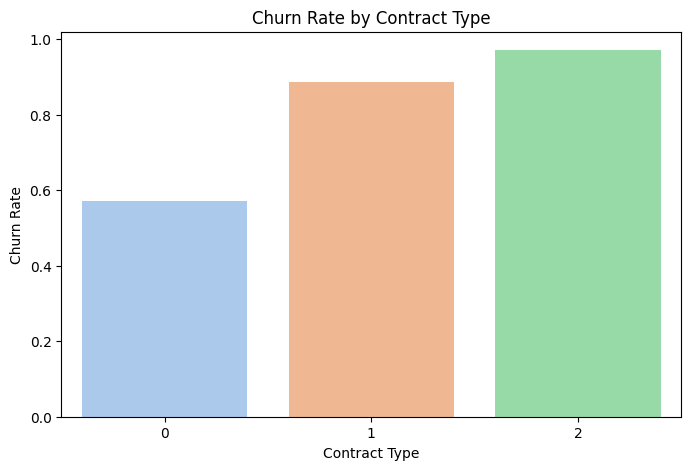

In [38]:
# Churn rate by contract type
churn_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=churn_by_contract, x='Contract', y='Churn', palette='pastel')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()


 Churn Distribution by Payment Method

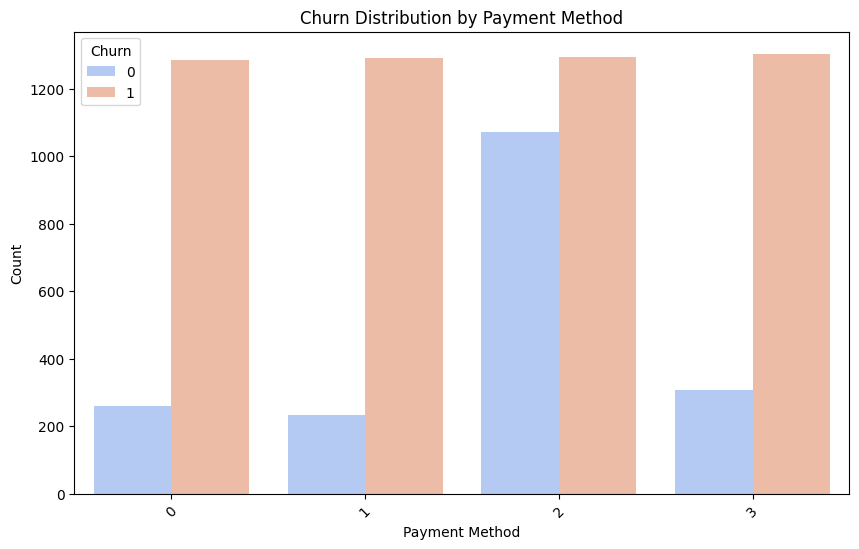

In [39]:
# Churn distribution by Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='coolwarm')
plt.title("Churn Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()


 Clustering for Churn Profiling

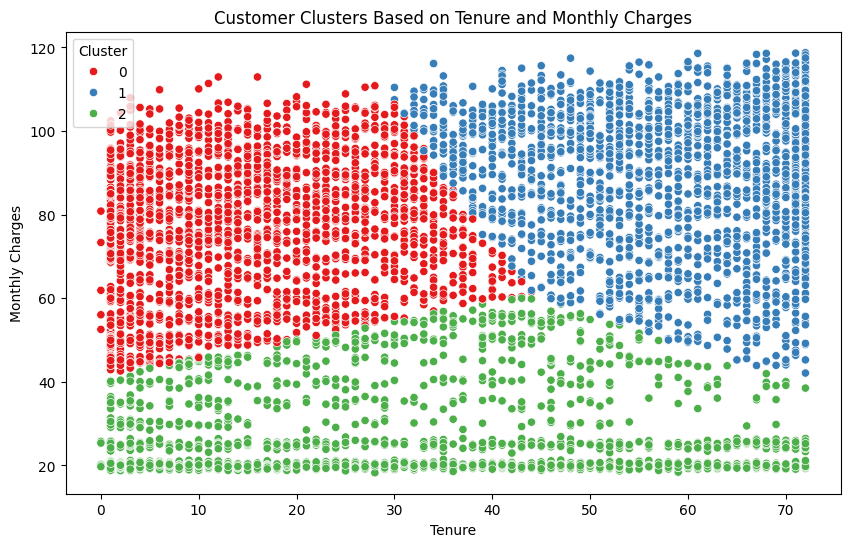

In [40]:
# Define features for clustering
clustering_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='Set1')
plt.title("Customer Clusters Based on Tenure and Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.legend(title="Cluster")
plt.show()


Statistical Tests

In [41]:
from scipy.stats import ttest_ind

# Compare tenure for churned vs non-churned customers
churned = df[df['Churn'] == 1]['tenure']
not_churned = df[df['Churn'] == 0]['tenure']

# T-test for tenure
t_stat, p_val = ttest_ind(churned, not_churned)
print(f"T-Test for Tenure:\nT-Statistic: {t_stat:.2f}, P-Value: {p_val:.10f}")
if p_val < 0.05:
    print("Significant difference in tenure between churned and non-churned customers.\n")
else:
    print("No significant difference in tenure.\n")


T-Test for Tenure:
T-Statistic: 31.58, P-Value: 0.0000000000
Significant difference in tenure between churned and non-churned customers.



A/B Testing

In [42]:
# Simulate interventions (e.g., discounts for high-risk customers)
high_risk_customers = X_test[y_pred == 1]  # Customers predicted to churn
print(f"Number of High-Risk Customers: {len(high_risk_customers)}")

# Simulate reduced monthly charges
high_risk_customers['MonthlyCharges'] *= 0.9  # Apply a 10% discount
reduced_churn = rf_model.predict(high_risk_customers)

# Compare churn rate before and after intervention
print(f"Churn Rate Before Intervention: {y_pred.sum() / len(y_pred):.2f}")
print(f"Churn Rate After Intervention: {reduced_churn.sum() / len(reduced_churn):.2f}")


Number of High-Risk Customers: 1125
Churn Rate Before Intervention: 0.80
Churn Rate After Intervention: 0.99


Feature Importance Heatmap (from Random Forest)

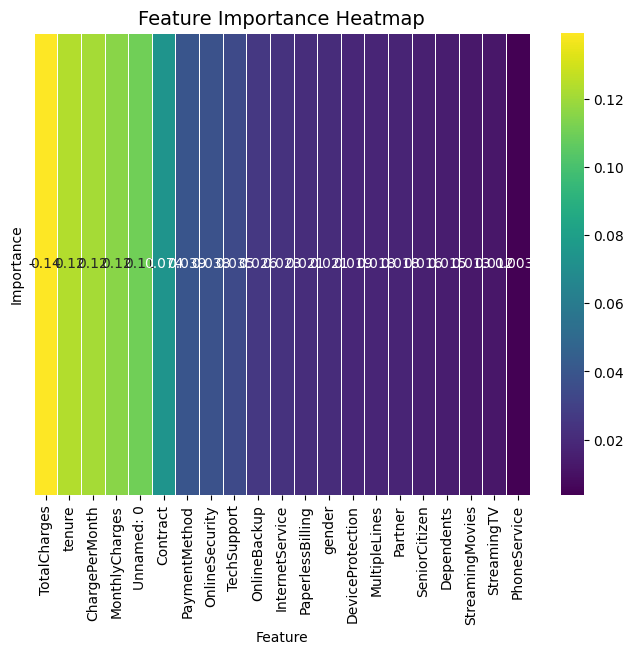

In [43]:
# Extract feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(feature_importance.set_index('Feature').T, cmap='viridis', annot=True, linewidths=0.5)

# Add a title
plt.title("Feature Importance Heatmap", fontsize=14)

# Show the plot
plt.show()
